https://github.com/int-brain-lab/iblvideo/blob/c25e7572153c87a90683021490e010ce55140a88/prototyping/motion_energy_pipeline.py

In [2]:
import os
import numpy as np
from one.api import ONE
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
#functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'

os.chdir(functions_path)
from video_functions import get_lick_times, lick_psth
from one_functions_generic import subjects_interest_data

### Get sessions from mice of interest

In [3]:
data_path =  '/home/ines/repositories/representation_learning_variability/Video/'
#data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Video/'

os.chdir(data_path)

mice = pickle.load(open("subject_intersection", "rb"))
naive_sessions = pickle.load(open("good_naive_sessions", "rb"))

local md5 mismatch on dataset: angelakilab/Subjects/NYU-47/2021-06-24/003/alf/_ibl_leftCamera.dlc.pqt


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-47/2021-06-24/003/alf/_ibl_leftCamera.dlc.a4861d09-8f3d-4428-9d5c-c4b4330ce1f9.pqt Bytes: 37474845


100%|██████████| 35.738797187805176/35.738797187805176 [00:08<00:00,  4.11it/s]
local md5 mismatch on dataset: angelakilab/Subjects/NYU-47/2021-06-24/003/alf/_ibl_leftCamera.dlc.pqt


Downloading: /home/ines/Downloads/ONE/alyx.internationalbrainlab.org/angelakilab/Subjects/NYU-47/2021-06-24/003/alf/_ibl_leftCamera.dlc.a4861d09-8f3d-4428-9d5c-c4b4330ce1f9.pqt Bytes: 37474845


100%|██████████| 35.738797187805176/35.738797187805176 [00:09<00:00,  3.77it/s]
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  licks_df = licks_df.append(temp_df)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  licks_df = licks_df.append(temp_df)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  licks_df = licks_df.append(temp_df)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:122: FutureWarning: The frame.append

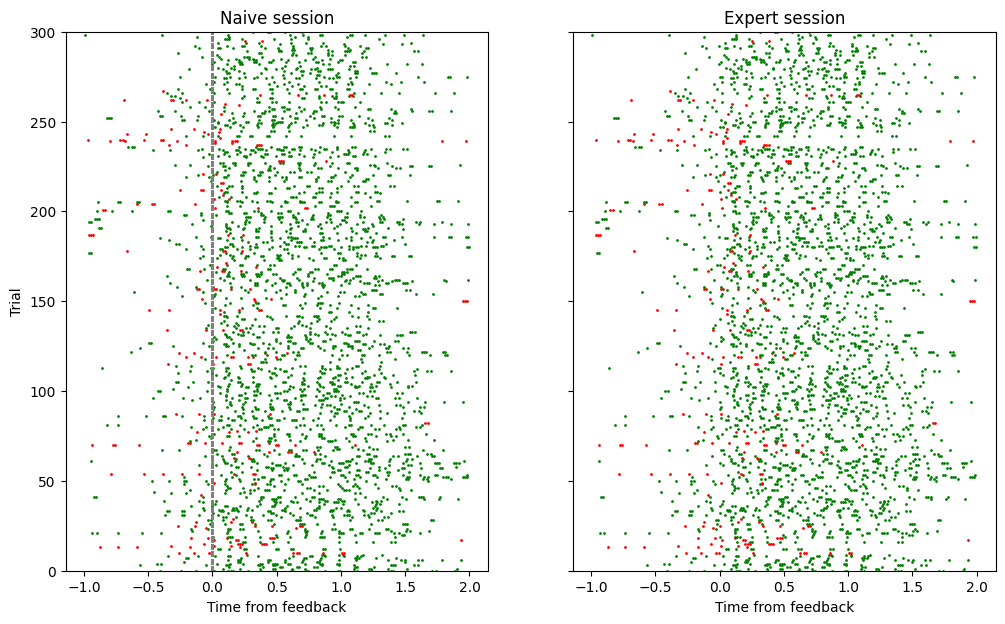

In [7]:
# Find paired sessions for each mouse
one = ONE()
for s, naive_session in enumerate(naive_sessions[7:8]):
    
    naive_session = 'c81e4e30-b8c8-4b9f-b91b-8409d35dbedb'
    naive_session = 'd23a44ef-1402-4ed7-97f5-47e9a7a504d9'
    naive_session = '288bfbf3-3700-4abe-b6e4-130b5c541e61'

    # Get mouse name
    session_details = one.list_datasets(naive_session, details=True)
    parts = session_details['session_path'][0].split('/')
    mouse_name = '/'.join(parts[2:3])
    
    # Get corresponding proficient sessions
    prof_sessions = subjects_interest_data([mouse_name], 'proficient', 'ephys')
    
    if len(prof_sessions) > 0:
        prof_sessions = prof_sessions['session'].unique()
        prof_session = prof_sessions[-1]
        prof_session = 'cb2ad999-a6cb-42ff-bf71-1774c57e5308'
        prof_session = '288bfbf3-3700-4abe-b6e4-130b5c541e61'
        
        # Get lick times for each of the sessions
        naive_lick_times = get_lick_times(naive_session, video_type = 'left')
        prof_lick_times = get_lick_times(prof_session, video_type = 'left')

        # Get trials for corresponding sessions
        
        trials_naive = one.load_object(naive_session, obj='trials', namespace='ibl')
        naive_df = trials_naive.to_df()
        
        trials_prof = one.load_object(prof_session, obj='trials', namespace='ibl')
        prof_df = trials_prof.to_df()
        
        
        licks_naive = lick_psth(naive_df, naive_lick_times, 1, 2, event='feedback_times')
        licks_prof = lick_psth(prof_df, prof_lick_times, 1, 2, event='feedback_times')

        # Plot data
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=[12, 7])
        # Naive session
        data = licks_naive
        num_trials = int(np.max(data['trial']))
        # Plotting the spikes
        for t, trial in enumerate(range(num_trials)):
            licks_correct = np.array(data.loc[(data['trial']==t) & (data['correct']==1), 'lick_times'])
            licks_incorrect = np.array(data.loc[(data['trial']==t) & (data['correct']==-1), 'lick_times'])
            ax[+0].scatter(licks_correct, np.full_like(licks_correct, t), color='green', s=1)
            ax[0].scatter(licks_incorrect, np.full_like(licks_incorrect, t), color='red', s=1)
            ax[0].vlines(0, 0, 300, color='grey', linestyles='dashed', linewidth=1)

        ax[0].set_title('Naive session')
        ax[0].set_xlabel('Time from feedback')
        ax[0].set_ylim([0, 300])
        

        # Prof session
        data = licks_prof
        num_trials = int(np.max(data['trial']))
        # Plotting the spikes
        for t, trial in enumerate(range(num_trials)):
            licks_correct = np.array(data.loc[(data['trial']==t) & (data['correct']==1), 'lick_times'])
            licks_incorrect = np.array(data.loc[(data['trial']==t) & (data['correct']==-1), 'lick_times'])
            ax[1].scatter(licks_correct, np.full_like(licks_correct, t), color='green', s=1)
            ax[1].scatter(licks_incorrect, np.full_like(licks_incorrect, t), color='red', s=1)
        ax[1].set_title('Expert session')
        ax[1].set_xlabel('Time from feedback')
        ax[0].set_ylabel('Trial')
